In [2]:
# Pure Quant Return Prediction Model
def predict_returns(stock_universe):
    features = []
    
    # Technical factors (price/volume patterns)
    features.append(momentum_signals(prices, [1, 3, 12, 36]))  # Multi-timeframe momentum
    features.append(mean_reversion_signals(prices, [5, 20, 60]))  # Mean reversion
    features.append(volume_price_divergence(prices, volume))
    
    # Cross-sectional factors (relative to peers)
    features.append(relative_strength_rank(returns))
    features.append(volatility_rank(volatility))
    features.append(correlation_breakdown(correlation_matrix))
    
    # Market microstructure
    features.append(bid_ask_spread_changes())
    features.append(order_flow_imbalance())
    features.append(high_frequency_reversal())
    
    # Alternative data (no fundamental interpretation)
    features.append(satellite_parking_lot_changes())  # Don't care WHY, just that it predicts
    features.append(social_media_mention_velocity())
    features.append(news_sentiment_momentum())
    
    # Cross-asset signals
    features.append(bond_equity_correlation_breaks())
    features.append(currency_momentum_spillover())
    features.append(commodity_sector_rotation())
    
    # Ensemble prediction
    return ensemble_model.predict(features)  # Random Forest + XGBoost + Neural Network

In [3]:
# Cell 1: Import Libraries and Setup
"""
Cipher Project - Beginner Testing Notebook
This notebook is designed for experimenting with quantitative finance concepts
Each cell builds upon the previous ones, starting with basics and moving to more advanced topics
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.optimize import minimize
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")
print("📊 Ready to start quantitative finance experiments")

✅ Libraries imported successfully!
📊 Ready to start quantitative finance experiments


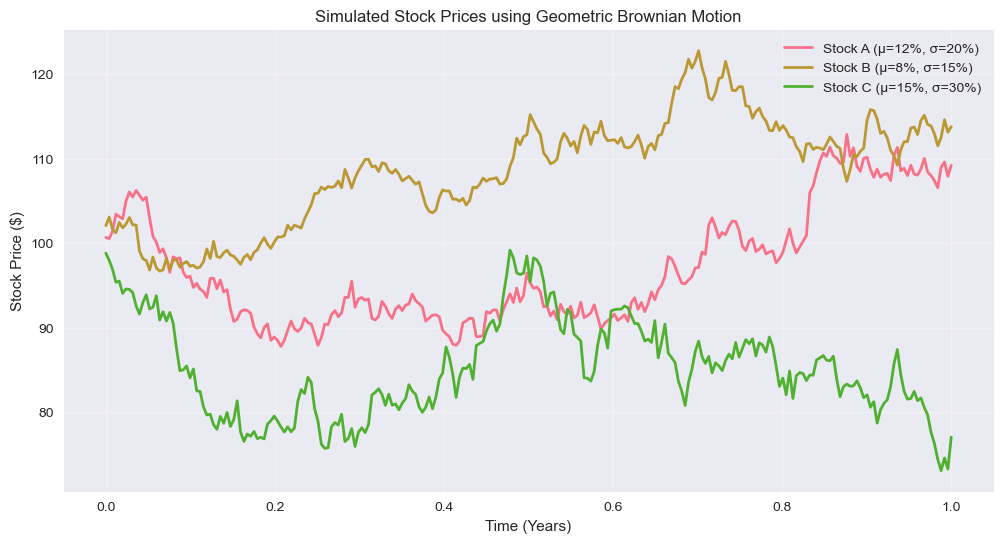

📈 Generated synthetic stock price data
Final prices: Stock A = $109.20, Stock B = $113.76, Stock C = $77.05


In [4]:
# Cell 2: Generate Synthetic Stock Price Data
"""
Let's start by creating fake stock price data using Geometric Brownian Motion
This is the foundation of modern finance - how stock prices are modeled mathematically
Formula: S(t) = S(0) * exp((μ - σ²/2)t + σW(t))
Where:
- S(t) = stock price at time t
- μ = expected return (drift)
- σ = volatility
- W(t) = Brownian motion (random walk)
"""

def generate_stock_prices(S0=100, mu=0.10, sigma=0.20, T=1.0, steps=252):
    """
    Generate stock prices using Geometric Brownian Motion
    
    Parameters:
    S0: Initial stock price ($100)
    mu: Annual expected return (10%)
    sigma: Annual volatility (20%)
    T: Time horizon in years (1 year)
    steps: Number of time steps (252 = trading days in a year)
    """
    dt = T / steps  # Time step size
    
    # Generate random shocks (the "randomness" in stock prices)
    random_shocks = np.random.normal(0, 1, steps)
    
    # Calculate price changes using GBM formula
    price_changes = (mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * random_shocks
    
    # Convert to actual prices by taking exponential and cumulative sum
    log_prices = np.cumsum(price_changes)
    prices = S0 * np.exp(log_prices)
    
    # Create time array
    times = np.linspace(0, T, steps)
    
    return times, prices

# Generate sample data for 3 different stocks
np.random.seed(42)  # For reproducible results
times, stock_A = generate_stock_prices(S0=100, mu=0.12, sigma=0.20)  # High return, medium vol
times, stock_B = generate_stock_prices(S0=100, mu=0.08, sigma=0.15)  # Medium return, low vol
times, stock_C = generate_stock_prices(S0=100, mu=0.15, sigma=0.30)  # High return, high vol

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(times, stock_A, label='Stock A (μ=12%, σ=20%)', linewidth=2)
plt.plot(times, stock_B, label='Stock B (μ=8%, σ=15%)', linewidth=2)
plt.plot(times, stock_C, label='Stock C (μ=15%, σ=30%)', linewidth=2)
plt.xlabel('Time (Years)')
plt.ylabel('Stock Price ($)')
plt.title('Simulated Stock Prices using Geometric Brownian Motion')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("📈 Generated synthetic stock price data")
print(f"Final prices: Stock A = ${stock_A[-1]:.2f}, Stock B = ${stock_B[-1]:.2f}, Stock C = ${stock_C[-1]:.2f}")



📊 STOCK PERFORMANCE METRICS
   Final Price  Total Return  Annualized Return  Volatility  Sharpe Ratio  \
A       109.20          8.48              10.04       19.38          0.42   
B       113.76         11.47              12.02       14.92          0.67   
C        77.05        -22.02             -20.50       29.87         -0.75   

   Max Drawdown  
A        -17.36  
B        -12.59  
C        -26.30  


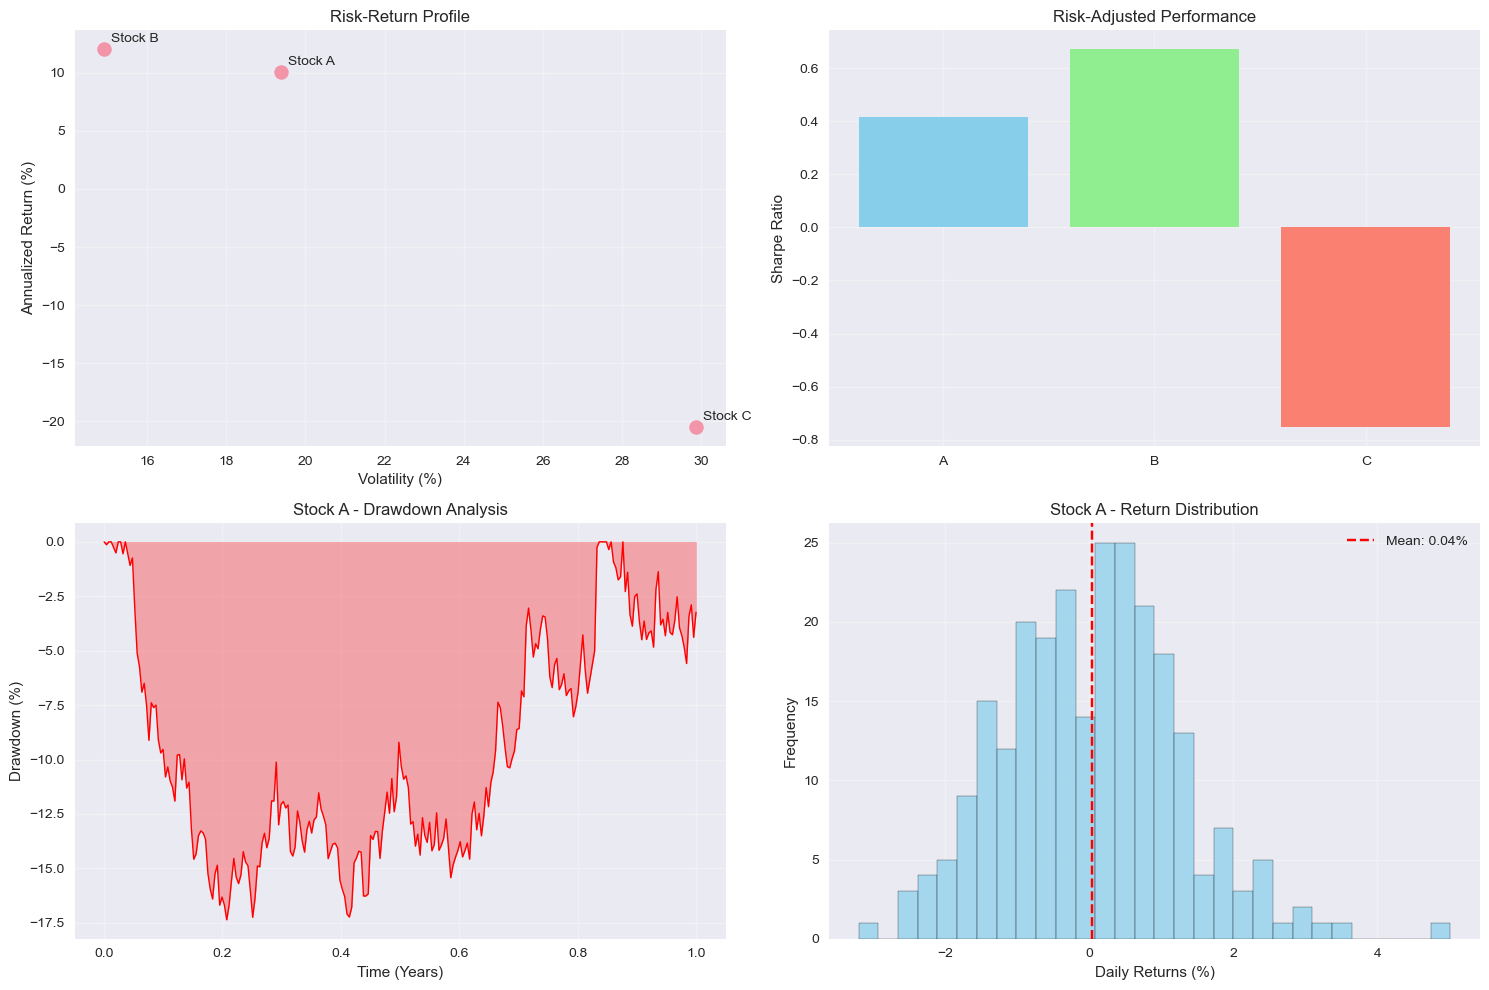

In [5]:
# Cell 3: Calculate Basic Financial Metrics
"""
Now let's calculate some fundamental metrics that quantitative traders use:
- Returns (daily percentage changes)
- Volatility (standard deviation of returns)
- Sharpe Ratio (risk-adjusted return)
- Maximum Drawdown (worst peak-to-trough decline)
"""

def calculate_returns(prices):
    """Calculate daily returns from price series"""
    return np.diff(prices) / prices[:-1]

def calculate_volatility(returns, annualize=True):
    """Calculate volatility (standard deviation of returns)"""
    vol = np.std(returns)
    if annualize:
        vol *= np.sqrt(252)  # Annualize using 252 trading days
    return vol

def calculate_sharpe_ratio(returns, risk_free_rate=0.02):
    """Calculate Sharpe ratio (excess return per unit of risk)"""
    excess_returns = np.mean(returns) * 252 - risk_free_rate  # Annualized excess return
    volatility = calculate_volatility(returns)
    return excess_returns / volatility if volatility > 0 else 0

def calculate_max_drawdown(prices):
    """Calculate maximum drawdown (worst peak-to-trough decline)"""
    cumulative_returns = prices / prices[0]  # Normalize to start at 1
    running_max = np.maximum.accumulate(cumulative_returns)
    drawdowns = (cumulative_returns - running_max) / running_max
    return np.min(drawdowns)

# Calculate metrics for all stocks
stocks = {'A': stock_A, 'B': stock_B, 'C': stock_C}
results = {}

for name, prices in stocks.items():
    returns = calculate_returns(prices)
    
    results[name] = {
        'Final Price': prices[-1],
        'Total Return': (prices[-1] / prices[0] - 1) * 100,
        'Annualized Return': (np.mean(returns) * 252) * 100,
        'Volatility': calculate_volatility(returns) * 100,
        'Sharpe Ratio': calculate_sharpe_ratio(returns),
        'Max Drawdown': calculate_max_drawdown(prices) * 100
    }

# Display results in a nice table
results_df = pd.DataFrame(results).T
print("\n📊 STOCK PERFORMANCE METRICS")
print("=" * 60)
print(results_df.round(2))

# Visualize the metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Returns vs Risk scatter plot
axes[0,0].scatter([results[stock]['Volatility'] for stock in results], 
                 [results[stock]['Annualized Return'] for stock in results], 
                 s=100, alpha=0.7)
for i, stock in enumerate(results.keys()):
    axes[0,0].annotate(f'Stock {stock}', 
                      (results[stock]['Volatility'], results[stock]['Annualized Return']),
                      xytext=(5, 5), textcoords='offset points')
axes[0,0].set_xlabel('Volatility (%)')
axes[0,0].set_ylabel('Annualized Return (%)')
axes[0,0].set_title('Risk-Return Profile')
axes[0,0].grid(True, alpha=0.3)

# Sharpe Ratios
sharpe_ratios = [results[stock]['Sharpe Ratio'] for stock in results]
axes[0,1].bar(results.keys(), sharpe_ratios, color=['skyblue', 'lightgreen', 'salmon'])
axes[0,1].set_ylabel('Sharpe Ratio')
axes[0,1].set_title('Risk-Adjusted Performance')
axes[0,1].grid(True, alpha=0.3)

# Drawdown analysis for Stock A
cumulative_A = stock_A / stock_A[0]
running_max_A = np.maximum.accumulate(cumulative_A)
drawdowns_A = (cumulative_A - running_max_A) / running_max_A * 100

axes[1,0].fill_between(times, drawdowns_A, 0, color='red', alpha=0.3)
axes[1,0].plot(times, drawdowns_A, color='red', linewidth=1)
axes[1,0].set_ylabel('Drawdown (%)')
axes[1,0].set_xlabel('Time (Years)')
axes[1,0].set_title('Stock A - Drawdown Analysis')
axes[1,0].grid(True, alpha=0.3)

# Return distribution
returns_A = calculate_returns(stock_A) * 100
axes[1,1].hist(returns_A, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[1,1].axvline(np.mean(returns_A), color='red', linestyle='--', label=f'Mean: {np.mean(returns_A):.2f}%')
axes[1,1].set_xlabel('Daily Returns (%)')
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_title('Stock A - Return Distribution')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



📋 OPTIONS PRICING TABLE (Stock Price: $109.20)
   Strike  Call Price  Put Price  Call Intrinsic  Put Intrinsic
0      80      30.199      0.001          29.204          0.000
1      85      25.273      0.013          24.204          0.000
2      90      20.393      0.071          19.204          0.000
3      95      15.668      0.284          14.204          0.000
4     100      11.302      0.856           9.204          0.000
5     105       7.555      2.046           4.204          0.000
6     110       4.635      4.064           0.000          0.796
7     115       2.595      6.963           0.000          5.796
8     120       1.324     10.630           0.000         10.796


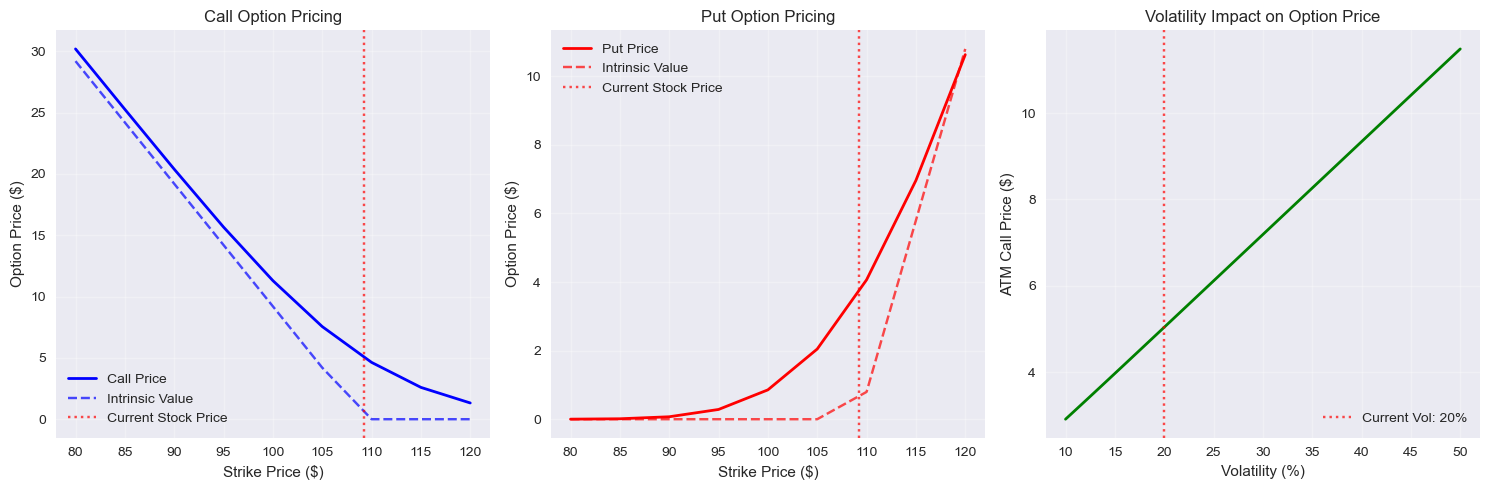

🎯 Black-Scholes implementation complete!
💡 Key insight: At-the-money call with 20% vol costs $5.04


In [6]:
# Cell 4: Black-Scholes Option Pricing (The Foundation!)
"""
Now we implement the famous Black-Scholes formula for pricing European options
This is ESSENTIAL knowledge for any quantitative trader
The formula gives us the theoretical price of an option based on:
- S: Current stock price
- K: Strike price
- T: Time to expiration
- r: Risk-free rate
- σ: Volatility
"""

from scipy.stats import norm

def black_scholes_call(S, K, T, r, sigma):
    """
    Calculate Black-Scholes call option price
    
    Parameters:
    S: Current stock price
    K: Strike price
    T: Time to expiration (in years)
    r: Risk-free interest rate
    sigma: Volatility (annualized)
    """
    # Calculate d1 and d2 parameters
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)

    # Calculate call price using cumulative normal distribution
    call_price = S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
    
    return call_price

def black_scholes_put(S, K, T, r, sigma):
    """Calculate Black-Scholes put option price using put-call parity"""
    call_price = black_scholes_call(S, K, T, r, sigma)
    put_price = call_price - S + K*np.exp(-r*T)  # Put-call parity
    return put_price

# Example: Price options on Stock A
current_price = stock_A[-1]  # Use final price from our simulation
strike_prices = np.arange(80, 121, 5)  # Strike prices from $80 to $120
time_to_expiry = 0.25  # 3 months
risk_free_rate = 0.05  # 5%
implied_vol = 0.20  # 20% volatility

# Calculate option prices for different strikes
call_prices = [black_scholes_call(current_price, K, time_to_expiry, risk_free_rate, implied_vol) 
               for K in strike_prices]
put_prices = [black_scholes_put(current_price, K, time_to_expiry, risk_free_rate, implied_vol) 
              for K in strike_prices]

# Create options pricing table
options_df = pd.DataFrame({
    'Strike': strike_prices,
    'Call Price': call_prices,
    'Put Price': put_prices,
    'Call Intrinsic': np.maximum(current_price - strike_prices, 0),
    'Put Intrinsic': np.maximum(strike_prices - current_price, 0)
})

print(f"\n📋 OPTIONS PRICING TABLE (Stock Price: ${current_price:.2f})")
print("=" * 70)
print(options_df.round(3))

# Visualize option pricing
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(strike_prices, call_prices, 'b-', linewidth=2, label='Call Price')
plt.plot(strike_prices, np.maximum(current_price - strike_prices, 0), 'b--', alpha=0.7, label='Intrinsic Value')
plt.axvline(current_price, color='red', linestyle=':', alpha=0.7, label='Current Stock Price')
plt.xlabel('Strike Price ($)')
plt.ylabel('Option Price ($)')
plt.title('Call Option Pricing')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(strike_prices, put_prices, 'r-', linewidth=2, label='Put Price')
plt.plot(strike_prices, np.maximum(strike_prices - current_price, 0), 'r--', alpha=0.7, label='Intrinsic Value')
plt.axvline(current_price, color='red', linestyle=':', alpha=0.7, label='Current Stock Price')
plt.xlabel('Strike Price ($)')
plt.ylabel('Option Price ($)')
plt.title('Put Option Pricing')
plt.legend()
plt.grid(True, alpha=0.3)

# Show how option prices change with volatility
vol_range = np.linspace(0.1, 0.5, 50)
atm_call_prices = [black_scholes_call(current_price, current_price, time_to_expiry, risk_free_rate, vol) 
                   for vol in vol_range]

plt.subplot(1, 3, 3)
plt.plot(vol_range * 100, atm_call_prices, 'g-', linewidth=2)
plt.axvline(implied_vol * 100, color='red', linestyle=':', alpha=0.7, label=f'Current Vol: {implied_vol*100:.0f}%')
plt.xlabel('Volatility (%)')
plt.ylabel('ATM Call Price ($)')
plt.title('Volatility Impact on Option Price')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("🎯 Black-Scholes implementation complete!")
print(f"💡 Key insight: At-the-money call with {implied_vol*100:.0f}% vol costs ${black_scholes_call(current_price, current_price, time_to_expiry, risk_free_rate, implied_vol):.2f}")



🔢 OPTION GREEKS ANALYSIS
Stock Price: $109.20 | Strike: $109.20 | Time to Expiry: 0.25 years

Call Option Greeks:
  Delta: 0.5695
  Gamma: 0.0360
  Theta: -0.0313
  Vega: 0.2145
  Rho: 0.1429

Put Option Greeks:
  Delta: -0.4305
  Gamma: 0.0360
  Theta: -0.0166
  Vega: 0.2145
  Rho: -0.1267


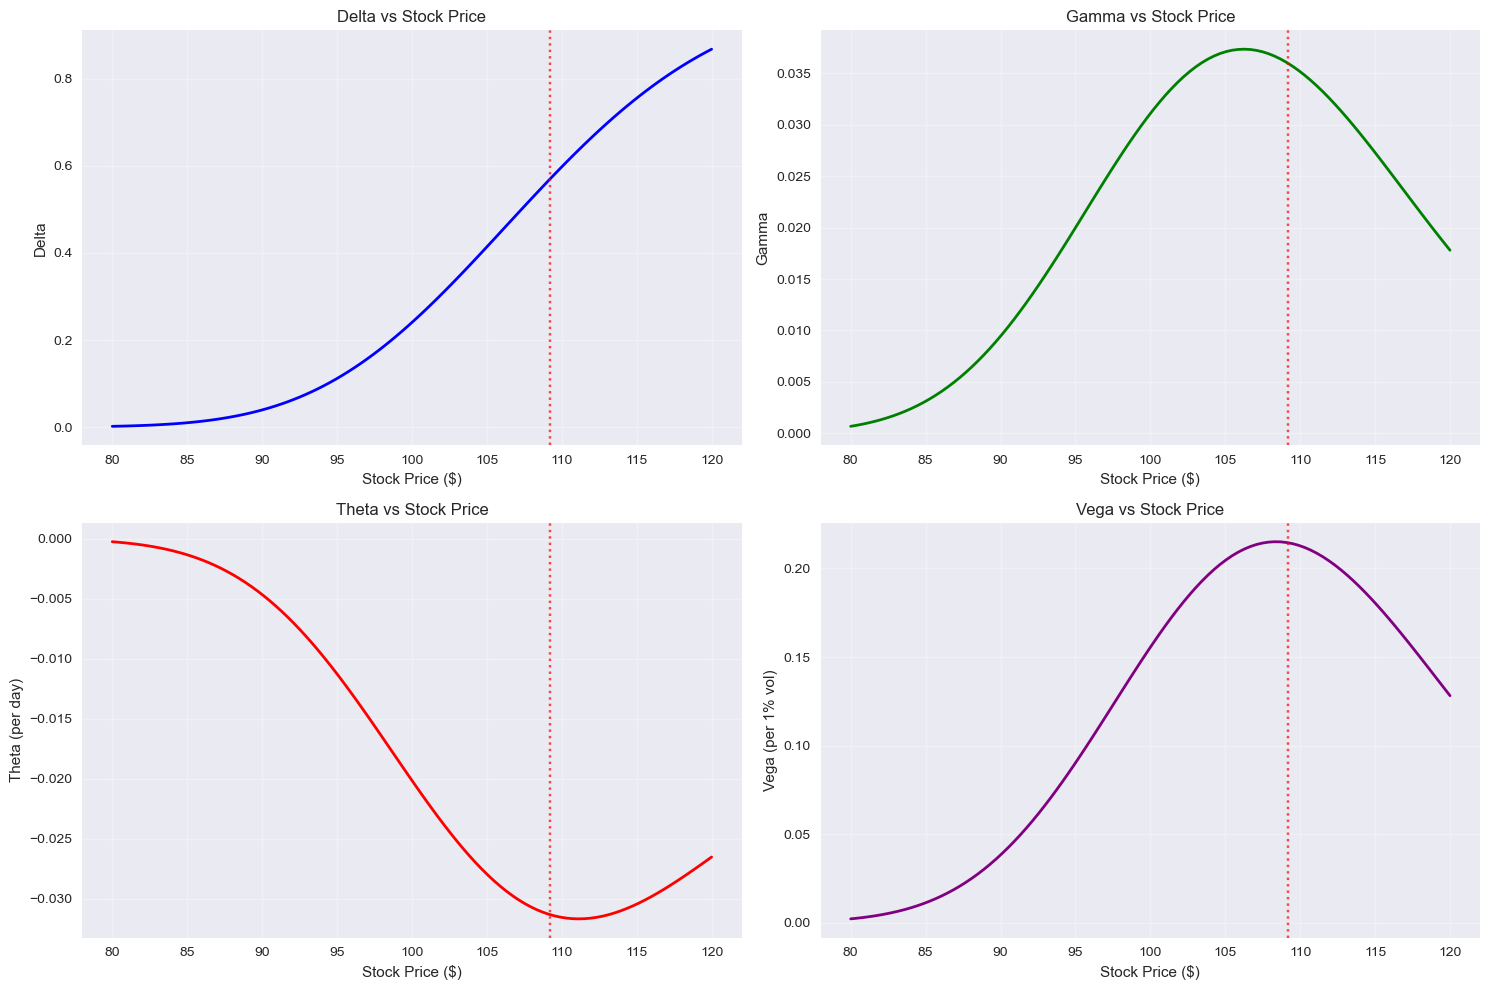

📊 Greeks analysis complete!
💡 Key insights:
   - Delta = 0.569: Option price changes ~$0.569 per $1 stock move
   - Theta = -0.031: Option loses ~$0.031 per day to time decay
   - Vega = 0.215: Option price changes ~$0.215 per 1% vol change


In [7]:
# Cell 5: Calculate Option Greeks (Risk Sensitivities)
"""
The "Greeks" measure how sensitive option prices are to different factors:
- Delta: Sensitivity to stock price changes
- Gamma: Rate of change of Delta
- Theta: Time decay
- Vega: Sensitivity to volatility changes
- Rho: Sensitivity to interest rate changes

These are CRUCIAL for risk management and hedging strategies!
"""

def calculate_greeks(S, K, T, r, sigma, option_type='call'):
    """Calculate all the Greeks for a given option"""
    
    # Basic Black-Scholes parameters
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    
    # Standard normal probability density function
    phi = lambda x: np.exp(-0.5*x**2) / np.sqrt(2*np.pi)
    
    greeks = {}
    
    if option_type == 'call':
        # Call option Greeks
        greeks['Delta'] = norm.cdf(d1)
        greeks['Gamma'] = phi(d1) / (S * sigma * np.sqrt(T))
        greeks['Theta'] = (-S * phi(d1) * sigma / (2 * np.sqrt(T)) 
                          - r * K * np.exp(-r*T) * norm.cdf(d2)) / 365
        greeks['Vega'] = S * phi(d1) * np.sqrt(T) / 100  # Per 1% vol change
        greeks['Rho'] = K * T * np.exp(-r*T) * norm.cdf(d2) / 100  # Per 1% rate change
        
    else:  # put option
        greeks['Delta'] = norm.cdf(d1) - 1
        greeks['Gamma'] = phi(d1) / (S * sigma * np.sqrt(T))  # Same as call
        greeks['Theta'] = (-S * phi(d1) * sigma / (2 * np.sqrt(T)) 
                          + r * K * np.exp(-r*T) * norm.cdf(-d2)) / 365
        greeks['Vega'] = S * phi(d1) * np.sqrt(T) / 100  # Same as call
        greeks['Rho'] = -K * T * np.exp(-r*T) * norm.cdf(-d2) / 100
    
    return greeks

# Calculate Greeks for at-the-money options
atm_strike = current_price
call_greeks = calculate_greeks(current_price, atm_strike, time_to_expiry, risk_free_rate, implied_vol, 'call')
put_greeks = calculate_greeks(current_price, atm_strike, time_to_expiry, risk_free_rate, implied_vol, 'put')

# Display Greeks
print("\n🔢 OPTION GREEKS ANALYSIS")
print("=" * 50)
print(f"Stock Price: ${current_price:.2f} | Strike: ${atm_strike:.2f} | Time to Expiry: {time_to_expiry:.2f} years")
print("\nCall Option Greeks:")
for greek, value in call_greeks.items():
    print(f"  {greek}: {value:.4f}")

print("\nPut Option Greeks:")  
for greek, value in put_greeks.items():
    print(f"  {greek}: {value:.4f}")

# Visualize how Greeks change with stock price
stock_range = np.linspace(80, 120, 100)
call_deltas = []
call_gammas = []
call_thetas = []
call_vegas = []

for S in stock_range:
    greeks = calculate_greeks(S, atm_strike, time_to_expiry, risk_free_rate, implied_vol, 'call')
    call_deltas.append(greeks['Delta'])
    call_gammas.append(greeks['Gamma'])
    call_thetas.append(greeks['Theta'])
    call_vegas.append(greeks['Vega'])

# Plot Greeks
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0,0].plot(stock_range, call_deltas, 'b-', linewidth=2)
axes[0,0].axvline(current_price, color='red', linestyle=':', alpha=0.7)
axes[0,0].set_xlabel('Stock Price ($)')
axes[0,0].set_ylabel('Delta')
axes[0,0].set_title('Delta vs Stock Price')
axes[0,0].grid(True, alpha=0.3)

axes[0,1].plot(stock_range, call_gammas, 'g-', linewidth=2)
axes[0,1].axvline(current_price, color='red', linestyle=':', alpha=0.7)
axes[0,1].set_xlabel('Stock Price ($)')
axes[0,1].set_ylabel('Gamma')
axes[0,1].set_title('Gamma vs Stock Price')
axes[0,1].grid(True, alpha=0.3)

axes[1,0].plot(stock_range, call_thetas, 'r-', linewidth=2)
axes[1,0].axvline(current_price, color='red', linestyle=':', alpha=0.7)
axes[1,0].set_xlabel('Stock Price ($)')
axes[1,0].set_ylabel('Theta (per day)')
axes[1,0].set_title('Theta vs Stock Price')
axes[1,0].grid(True, alpha=0.3)

axes[1,1].plot(stock_range, call_vegas, 'purple', linewidth=2)
axes[1,1].axvline(current_price, color='red', linestyle=':', alpha=0.7)
axes[1,1].set_xlabel('Stock Price ($)')
axes[1,1].set_ylabel('Vega (per 1% vol)')
axes[1,1].set_title('Vega vs Stock Price')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Greeks analysis complete!")
print("💡 Key insights:")
print(f"   - Delta = {call_greeks['Delta']:.3f}: Option price changes ~${call_greeks['Delta']:.3f} per $1 stock move")
print(f"   - Theta = {call_greeks['Theta']:.3f}: Option loses ~${abs(call_greeks['Theta']):.3f} per day to time decay")
print(f"   - Vega = {call_greeks['Vega']:.3f}: Option price changes ~${call_greeks['Vega']:.3f} per 1% vol change")



In [ ]:
# Cell 6: Simple Portfolio Optimization (Mean-Variance)
"""
Now let's implement Markowitz portfolio optimization - the foundation of modern portfolio theory
We'll find the optimal allocation between our three stocks to maximize risk-adjusted returns
This introduces concepts of:
- Expected returns and covariance estimation
- Efficient frontier calculation
- Risk-return optimization
"""

# Create returns matrix for our three stocks
returns_A = calculate_returns(stock_A)
returns_B = calculate_returns(stock_B) 
returns_C = calculate_returns(stock_C)

# Combine into a returns matrix
returns_matrix = np.column_stack([returns_A, returns_B, returns_C])
returns_df = pd.DataFrame(returns_matrix, columns=['Stock_A', 'Stock_B', 'Stock_C'])

# Calculate expected returns and covariance matrix
expected_returns = returns_df.mean() * 252  # Annualize
cov_matrix = returns_df.cov() * 252  # Annualize

print("📈 PORTFOLIO OPTIMIZATION SETUP")
print("=" * 40)
print("Expected Annual Returns:")
print(expected_returns.round(4))
print("\nCovariance Matrix:")
print(cov_matrix.round(6))